## Simple example of linear regression

In [9]:
# Useful imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

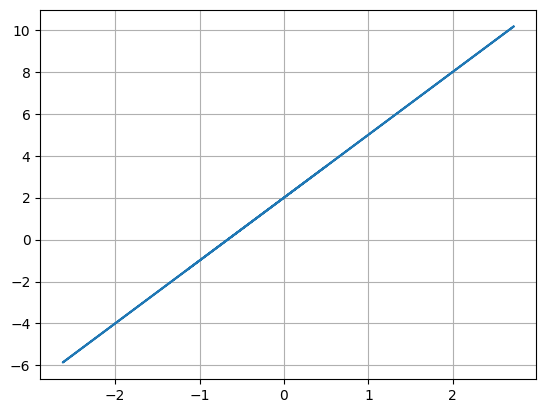

In [10]:
# Import data from files
x_train = np.loadtxt("train_set/x_train.csv", delimiter=",")
y_train = np.loadtxt("train_set/y_train.csv", delimiter=",")
x_test = np.loadtxt("test_set/x_test.csv", delimiter=",")
y_test = np.loadtxt("test_set/y_test.csv", delimiter=",")

# Plot train data
plt.plot(x_train, y_train)
plt.grid()
plt.show()

Creation of the sequential model formed by a single layer of _Dense_ type, which as params to be learned has only (`a`, `b`) of the equation $y = ax+b$

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Definition of the model complilator, with the loss parameter we go to specify how to calculate the loss, in this case with mean_squared_error $\frac{1}{n}\sum_{i = 0}^m (\hat{Y_i} - Y_i)^2$ and with the optimizer parameter we go to define the update algorithm the parameters

In [12]:
# Complier settings
model.compile(
    loss = tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.Adam()
)

Min loss value: 7.600e-08


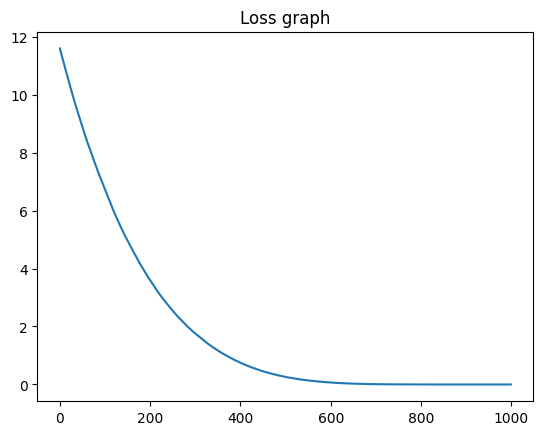

In [13]:
# Train model
history = model.fit(x_train, y_train, epochs=1000, verbose=0)
# Loss graph
loss_hist = history.history['loss']
plt.plot(range(1000), loss_hist)
plt.title("Loss graph")

print("Min loss value: %2.3e" %min(loss_hist))


In [14]:
# Make predictions
y_predict = model.predict(x_test)

# Relation between correct values and predicted values
np.c_[y_test, y_predict][:20]

7/7 [==============================] - 0s 1ms/step


array([[ 3.49014246,  3.4899807 ],
       [ 1.5852071 ,  1.5852294 ],
       [ 3.94306561,  3.94286013],
       [ 6.56908957,  6.56862974],
       [ 1.29753988,  1.29759002],
       [ 1.29758913,  1.29763937],
       [ 6.73763845,  6.73716259],
       [ 4.30230419,  4.30206394],
       [ 0.59157684,  0.59169531],
       [ 3.62768013,  3.62750483],
       [ 0.60974692,  0.60986364],
       [ 0.60281074,  0.60292816],
       [ 2.72588681,  2.72579885],
       [-3.73984073, -3.73930311],
       [-3.1747535 , -3.17427063],
       [ 0.31313741,  0.31328285],
       [-1.03849336, -1.03821719],
       [ 2.942742  ,  2.94263315],
       [-0.72407223, -0.72382653],
       [-2.2369111 , -2.23651886]])

Comparison of the two graphs, the first formed by the corrected data from the test dataset and the second with the data predicted by the model

Text(0.5, 1.0, 'Predict values')

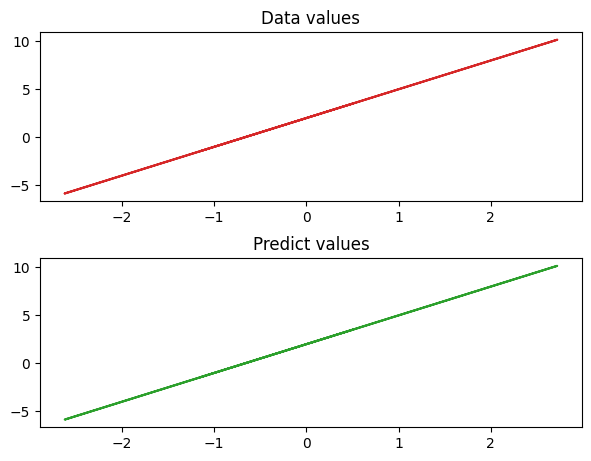

In [15]:

fig, axs = plt.subplots(2)
fig.tight_layout(pad=2)
axs[0].set_title("Data values")
axs[0].plot(x_test, y_test, 'tab:red')
axs[1].plot(x_test, y_predict, 'tab:green')
axs[1].set_title("Predict values")
